In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from glob import glob

In [2]:
# Extract path from the male and female in crop data folder and put in a list
male_paths = glob('crop_data/male/*.jpg')
female_paths = glob('crop_data/female/*.jpg')

print(len(male_paths), len(female_paths))

2171 2586


In [3]:
df_female = pd.DataFrame(female_paths, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(male_paths, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis = 0)
df

,filepath,gender
0,crop_data/female\female_0.jpg,female
1,crop_data/female\female_1.jpg,female
2,crop_data/female\female_100.jpg,female
3,crop_data/female\female_1002.jpg,female
4,crop_data/female\female_1005.jpg,female
...,...,...
2166,crop_data/male\male_994.jpg,male
2167,crop_data/male\male_996.jpg,male
2168,crop_data/male\male_997.jpg,male
2169,crop_data/male\male_998.jpg,male


In [4]:
df.shape

(4757, 2)

In [5]:
## Add a column for size of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

df['size'] = df['filepath'].apply(get_size) ## get size of the image
df

,filepath,gender,size
0,crop_data/female\female_0.jpg,female,273
1,crop_data/female\female_1.jpg,female,182
2,crop_data/female\female_100.jpg,female,122
3,crop_data/female\female_1002.jpg,female,122
4,crop_data/female\female_1005.jpg,female,182
...,...,...,...
2166,crop_data/male\male_994.jpg,male,122
2167,crop_data/male\male_996.jpg,male,54
2168,crop_data/male\male_997.jpg,male,122
2169,crop_data/male\male_998.jpg,male,81


# Exploratory Data Analysis

## Distribution between female and male

<Axes: ylabel='count'>

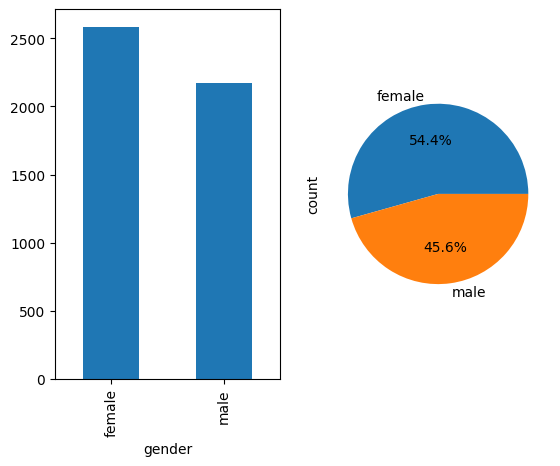

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dist_gender = df['gender'].value_counts()
dist_gender.plot(kind='bar', ax=ax[0])
dist_gender.plot(kind='pie', ax=ax[1], autopct='%0.1f%%')

<Axes: ylabel='size'>

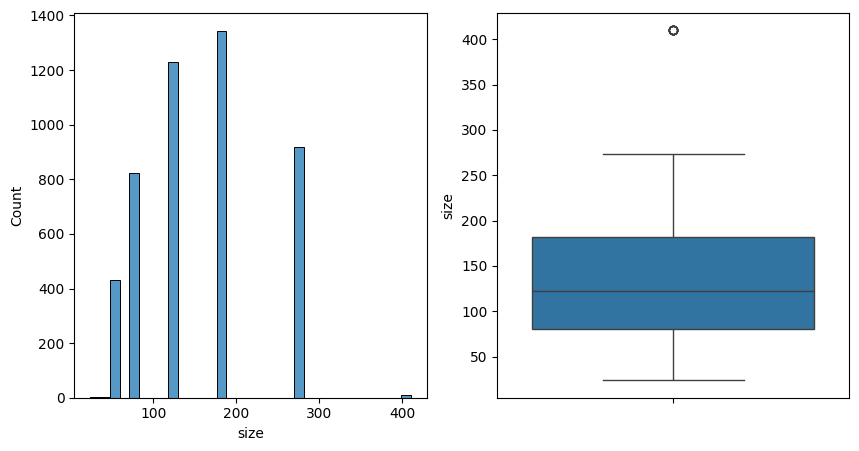

In [7]:
# Size 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['size'])
plt.subplot(1,2,2)
sns.boxplot(df['size'])

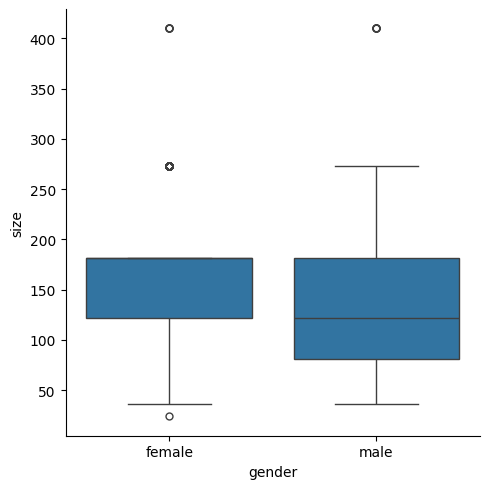

In [8]:
sns.catplot(data=df, x='gender', y='size', kind='box')

1. we have almost equal distribution of gender
2. most of the images are having a size higher than 60
3. most of the females images are hd

- **consider the image with dimensions more than 60**
- **resize all the images into 100x100**

In [9]:
df_filter = df.query('size > 60')
df_filter.shape

(4319, 3)

In [10]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.552211
male      0.447789
Name: proportion, dtype: float64

In [11]:
def structuring(path):
    try:
        # read image
        img = cv2.imread(path)
        # convert to gray scale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # get size of image
        size = gray.shape[0]
        # resize image
        if size >= 100:
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_AREA)
        else :
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_CUBIC)

        # flatten image
        gray_resize = gray_resize.flatten()

        return gray_resize
    except Exception as e:
        print(path, e)
        return None



In [12]:
df_filter['data'] = df_filter['filepath'].apply(structuring) ## convert all images into 100x100

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7708\3499525963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['data'] = df_filter['filepath'].apply(structuring) ## convert all images into 100x100


In [13]:
df_filter.head()

,filepath,gender,size,data
0,crop_data/female\female_0.jpg,female,273,"[199, 189, 187, 181, 183, 184, 178, 176, 187, ..."
1,crop_data/female\female_1.jpg,female,182,"[31, 25, 33, 28, 29, 29, 31, 33, 35, 35, 50, 7..."
2,crop_data/female\female_100.jpg,female,122,"[50, 49, 35, 34, 42, 40, 36, 40, 68, 60, 46, 4..."
3,crop_data/female\female_1002.jpg,female,122,"[136, 127, 114, 96, 96, 94, 94, 116, 149, 163,..."
4,crop_data/female\female_1005.jpg,female,182,"[234, 236, 234, 232, 229, 186, 139, 105, 59, 4..."


In [14]:
data = df_filter['data'].apply(pd.Series)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,199,189,187,181,183,184,178,176,187,181,...,109,108,109,111,114,116,121,118,117,119
1,31,25,33,28,29,29,31,33,35,35,...,45,29,23,30,22,34,25,35,55,18
2,50,49,35,34,42,40,36,40,68,60,...,208,227,228,235,237,231,222,215,212,210
3,136,127,114,96,96,94,94,116,149,163,...,68,54,68,67,74,91,97,103,103,96
4,234,236,234,232,229,186,139,105,59,47,...,241,240,237,237,239,238,238,242,241,241


In [15]:
data.columns = [f'pixel_{i}' for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,199,189,187,181,183,184,178,176,187,181,...,109,108,109,111,114,116,121,118,117,119
1,31,25,33,28,29,29,31,33,35,35,...,45,29,23,30,22,34,25,35,55,18
2,50,49,35,34,42,40,36,40,68,60,...,208,227,228,235,237,231,222,215,212,210
3,136,127,114,96,96,94,94,116,149,163,...,68,54,68,67,74,91,97,103,103,96
4,234,236,234,232,229,186,139,105,59,47,...,241,240,237,237,239,238,238,242,241,241


## Data Normalization

In [16]:
data = data/255.0
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.780392,0.741176,0.733333,0.709804,0.717647,0.721569,0.698039,0.690196,0.733333,0.709804,...,0.427451,0.423529,0.427451,0.435294,0.447059,0.454902,0.474510,0.462745,0.458824,0.466667
1,0.121569,0.098039,0.129412,0.109804,0.113725,0.113725,0.121569,0.129412,0.137255,0.137255,...,0.176471,0.113725,0.090196,0.117647,0.086275,0.133333,0.098039,0.137255,0.215686,0.070588
2,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.815686,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529
3,0.533333,0.498039,0.447059,0.376471,0.376471,0.368627,0.368627,0.454902,0.584314,0.639216,...,0.266667,0.211765,0.266667,0.262745,0.290196,0.356863,0.380392,0.403922,0.403922,0.376471
4,0.917647,0.925490,0.917647,0.909804,0.898039,0.729412,0.545098,0.411765,0.231373,0.184314,...,0.945098,0.941176,0.929412,0.929412,0.937255,0.933333,0.933333,0.949020,0.945098,0.945098


In [17]:
data['gender'] = df_filter['gender']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.780392,0.741176,0.733333,0.709804,0.717647,0.721569,0.698039,0.690196,0.733333,0.709804,...,0.423529,0.427451,0.435294,0.447059,0.454902,0.474510,0.462745,0.458824,0.466667,female
1,0.121569,0.098039,0.129412,0.109804,0.113725,0.113725,0.121569,0.129412,0.137255,0.137255,...,0.113725,0.090196,0.117647,0.086275,0.133333,0.098039,0.137255,0.215686,0.070588,female
2,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529,female
3,0.533333,0.498039,0.447059,0.376471,0.376471,0.368627,0.368627,0.454902,0.584314,0.639216,...,0.211765,0.266667,0.262745,0.290196,0.356863,0.380392,0.403922,0.403922,0.376471,female
4,0.917647,0.925490,0.917647,0.909804,0.898039,0.729412,0.545098,0.411765,0.231373,0.184314,...,0.941176,0.929412,0.929412,0.937255,0.933333,0.933333,0.949020,0.945098,0.945098,female


In [18]:
## count the number of null values
data.isnull().sum().sum()

0

In [19]:
## remove null values
data = data.dropna()
data.shape

(4319, 10001)

In [20]:
import pickle

pickle.dump(data, open('data/data_images_100_100.pickle', 'wb'))